In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("D:/MIT/Semester-6/Machine Learning Lab/Datasets/autism_screening.csv")

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [4]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [5]:
df = df.replace('?',np.nan)

In [6]:
df.isin(['?']).sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [7]:
df.isna().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

In [8]:
df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2.0,18 and more,NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7.0,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3.0,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,NaN,no,no,Russia,no,7.0,18 and more,NaN,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6.0,18 and more,Self,NO


In [9]:
imputer = SimpleImputer(strategy='most_frequent',missing_values=np.nan)
df['age'] = imputer.fit_transform(df[['age']]).ravel()
df['ethnicity'] = imputer.fit_transform(df[['ethnicity']]).ravel()
df['relation'] = imputer.fit_transform(df[['relation']]).ravel()

In [10]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'result')])

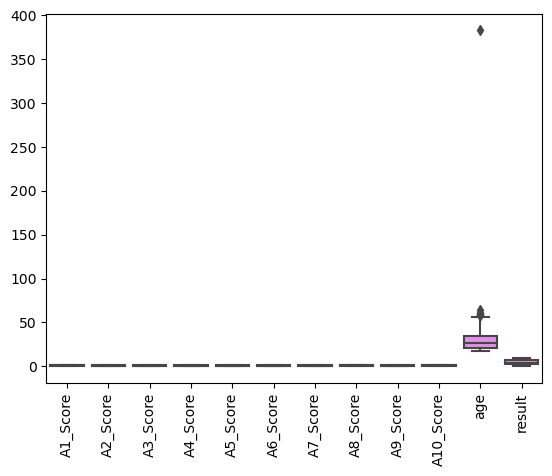

In [11]:
sns.boxplot(df)
plt.xticks(rotation=90)

In [12]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

df = df[df["age"]<=upper_bound]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'result')])

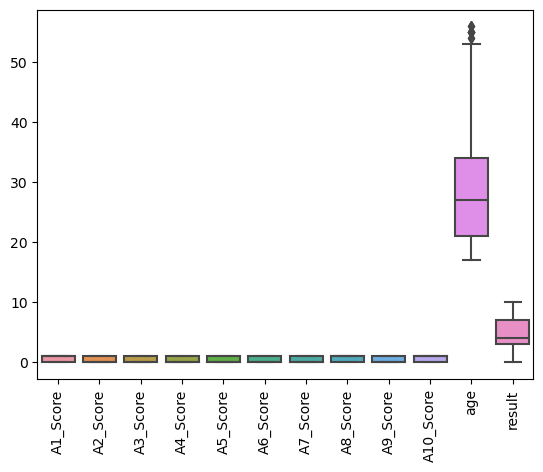

In [13]:
sns.boxplot(df)

plt.xticks(rotation=90)

In [14]:
df.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype=object)

In [15]:
labels=df['Class/ASD'].unique().tolist()
labels

['NO', 'YES']

In [16]:
col_names = ['gender','austim','contry_of_res','used_app_before','age_desc','ethnicity','relation','jundice','Class/ASD']

lbl_enc = OrdinalEncoder()
for i in col_names:
    df[i] = lbl_enc.fit_transform(df[[i]])

C:\Users\Sciddhanto\AppData\Local\Temp\ipykernel_395980\2401649484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = lbl_enc.fit_transform(df[[i]])
C:\Users\Sciddhanto\AppData\Local\Temp\ipykernel_395980\2401649484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = lbl_enc.fit_transform(df[[i]])
C:\Users\Sciddhanto\AppData\Local\Temp\ipykernel_395980\2401649484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [17]:
df.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0.0,9.0,0.0,0.0,64.0,0.0,6.0,0.0,4.0,0.0
1,1,1,0,1,0,0,0,1,0,1,...,1.0,3.0,0.0,1.0,13.0,0.0,5.0,0.0,4.0,0.0
2,1,1,0,1,1,0,1,1,1,1,...,1.0,3.0,1.0,1.0,56.0,0.0,8.0,0.0,2.0,1.0
3,1,1,0,1,0,0,1,1,0,1,...,0.0,9.0,0.0,1.0,64.0,0.0,6.0,0.0,4.0,0.0
4,1,0,0,0,0,0,0,1,0,0,...,0.0,9.0,0.0,0.0,22.0,0.0,2.0,0.0,4.0,0.0
5,1,1,1,1,1,0,1,1,1,1,...,1.0,5.0,1.0,0.0,64.0,0.0,9.0,0.0,4.0,1.0
6,0,1,0,0,0,0,0,1,0,0,...,0.0,1.0,0.0,0.0,64.0,0.0,2.0,0.0,4.0,0.0
8,1,1,0,0,1,0,0,1,1,1,...,1.0,9.0,0.0,0.0,64.0,0.0,6.0,0.0,4.0,0.0
9,1,1,1,1,0,1,1,1,1,0,...,1.0,0.0,1.0,1.0,9.0,0.0,8.0,0.0,0.0,1.0
10,1,1,1,1,1,1,1,1,1,1,...,1.0,9.0,0.0,0.0,64.0,0.0,10.0,0.0,3.0,1.0


In [22]:
# labels=df['Class/ASD'].unique().tolist()
# labels

In [18]:
X = df.drop("Class/ASD",axis=1)
y = df['Class/ASD']

In [19]:
df.corr()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
A1_Score,1.000000,0.006263,0.072339,0.126835,0.167774,0.106084,0.217488,0.155845,0.142160,0.118797,...,-0.072356,0.046748,-0.020994,0.095185,0.020076,-0.040258,0.397672,NaN,0.011230,0.295717
A2_Score,0.006263,1.000000,0.219784,0.154249,0.146975,0.177015,-0.048496,0.037457,0.197418,0.064793,...,-0.050676,0.124112,0.110102,0.067852,0.138579,-0.009179,0.384965,NaN,-0.042522,0.304171
A3_Score,0.072339,0.219784,1.000000,0.405424,0.265292,0.265006,0.077819,0.021371,0.312770,0.172393,...,-0.001669,0.107638,0.060511,0.109947,0.046516,0.056968,0.552012,NaN,0.033596,0.439569
A4_Score,0.126835,0.154249,0.405424,1.000000,0.307469,0.291944,0.151544,0.011549,0.325619,0.214935,...,-0.059666,0.138649,0.063752,0.191634,0.039857,0.024363,0.586192,NaN,-0.010316,0.469032
A5_Score,0.167774,0.146975,0.265292,0.307469,1.000000,0.385127,0.232556,0.100478,0.395635,0.262117,...,-0.040143,0.006851,0.029980,0.082846,-0.024185,0.000381,0.636538,NaN,0.047400,0.531872
A6_Score,0.106084,0.177015,0.265006,0.291944,0.385127,1.000000,0.168717,0.101615,0.478079,0.291371,...,-0.084565,0.105240,0.073704,0.104616,-0.019533,0.088852,0.624682,NaN,-0.093243,0.585007
A7_Score,0.217488,-0.048496,0.077819,0.151544,0.232556,0.168717,1.000000,0.086738,0.182967,0.243685,...,0.059644,-0.006811,0.025203,-0.019287,-0.020353,-0.022764,0.450230,NaN,0.032212,0.347172
A8_Score,0.155845,0.037457,0.021371,0.011549,0.100478,0.101615,0.086738,1.000000,0.109039,0.100295,...,0.061696,-0.040726,0.006540,0.035643,-0.041116,-0.042358,0.329645,NaN,0.045067,0.241244
A9_Score,0.142160,0.197418,0.312770,0.325619,0.395635,0.478079,0.182967,0.109039,1.000000,0.279697,...,0.001061,0.073367,0.052981,0.159839,-0.079027,0.050511,0.659271,NaN,-0.050810,0.636719
A10_Score,0.118797,0.064793,0.172393,0.214935,0.262117,0.291371,0.243685,0.100295,0.279697,1.000000,...,-0.059032,0.056988,0.047218,0.110768,0.025223,-0.042747,0.535848,NaN,0.026166,0.384445


In [20]:
mic = mutual_info_classif(X,y)
mic

array([0.05844966, 0.0526388 , 0.10530182, 0.13225774, 0.1468054 ,
       0.16113985, 0.06766044, 0.01340844, 0.21810137, 0.09286895,
       0.01396341, 0.        , 0.04851288, 0.00124611, 0.00191386,
       0.09040812, 0.        , 0.5797603 , 0.        , 0.01126661])

In [21]:
mic = pd.Series(mic)
mic.index = X.columns
mic.sort_values(ascending=False)

result             0.579760
A9_Score           0.218101
A6_Score           0.161140
A5_Score           0.146805
A4_Score           0.132258
A3_Score           0.105302
A10_Score          0.092869
contry_of_res      0.090408
A7_Score           0.067660
A1_Score           0.058450
A2_Score           0.052639
ethnicity          0.048513
age                0.013963
A8_Score           0.013408
relation           0.011267
austim             0.001914
jundice            0.001246
gender             0.000000
used_app_before    0.000000
age_desc           0.000000
dtype: float64

In [22]:
X = X.drop(['gender','age_desc'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_std = scaler.fit_transform(X_train)
Xtest_std = scaler.transform(X_test)

In [25]:
entropy_clf = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=42)
entropy_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [26]:
print('Training Acuuracy:', entropy_clf.score(X_train,y_train))
print('Test Accuracy:',entropy_clf.score(X_test,y_test))

Training Acuuracy: 1.0
Test Accuracy: 1.0


In [27]:
entropy_clf.fit(Xtrain_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [28]:
print('Training Acuuracy:', entropy_clf.score(Xtrain_std,y_train))
print('Test Accuracy:',entropy_clf.score(Xtest_std,y_test))

Training Acuuracy: 1.0
Test Accuracy: 1.0


[Text(0.5, 0.75, 'x[16] <= 6.5\nentropy = 0.857\nsamples = 466\nvalue = [335, 131]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 335\nvalue = [335, 0]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 131\nvalue = [0, 131]')]

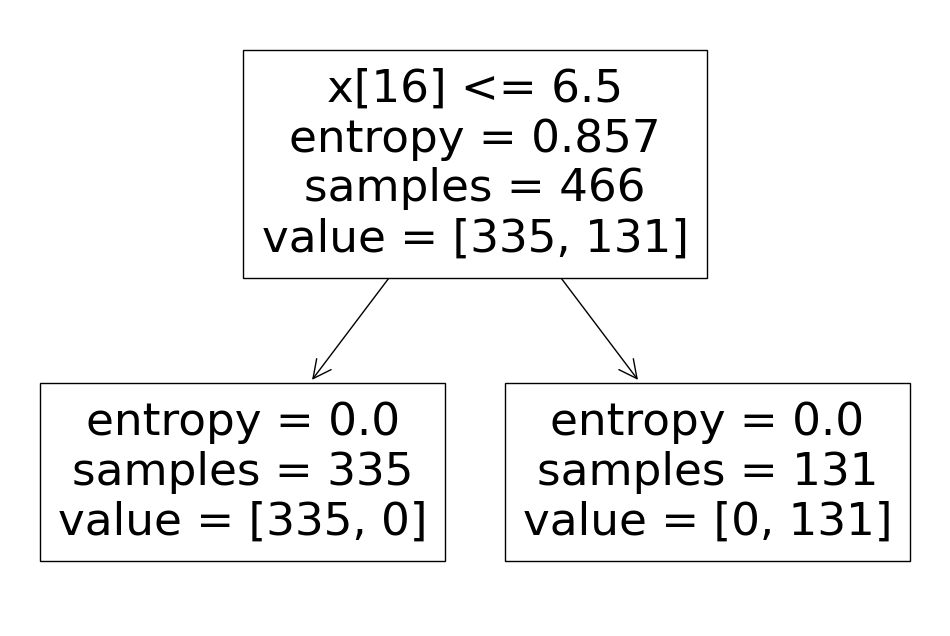

In [29]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(entropy_clf.fit(X_train,y_train))